<a href="https://colab.research.google.com/github/shayesteh99/Tehran-Traffic/blob/main/interpret_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd 'gdrive/MyDrive/Neshan2'
%ls

/content/gdrive/.shortcut-targets-by-id/1kb7msLseHDgbNcoeHcAexfHINwu2zRER/Neshan2
check_neighbors_average.ipynb
Classification/
DATA/
find_common_days.ipynb
find_good_segments.ipynb
find_mapped_good_neighors.ipynb
find_neighbors.ipynb
find_shorter_neighbors.ipynb
get_good_segment-information.ipynb
get_important_good_segment_information.ipynb
get_mapped_good_segment_information.ipynb
GOOD_DATA/
GOOD_IMPORTANT_DATA/
good_important_segment_information.csv
GOOD_MAPPED_DATA/
good_mapped_segment_information.csv
good_segment_information.csv
Important_segment.csv
just_good_neighbors_1000.csv
just_good_neighbors_1500.csv
make_mapped_good_days.ipynb
MAPPED/
mapped_good_data.csv
mapped_good_igraph.ipynb
mapped_good_neighors.csv
mapped_important_good_neighors.csv
mapped_segment.csv
NEIGHBOR/
neighbors_1000.csv
neighbors_750.csv
new_data_df.csv
PP/
Regression/
segment1.txt
segment_locatiion.ipynb
segments_corrected.csv
Shayesteh/
To_verify.ipynb
to_verify_mlpregressor.ipynb
variance.ipynb
vars.txt


In [ ]:
results = pd.read_csv("Shayesteh/models/XGBoost/prediction_dataset.csv")
results['error'] = np.fabs(results['label'].to_numpy() - results['pred'].to_numpy())

In [ ]:
print(results)

        Unnamed: 0  Unnamed: 0.1        seg_id  ...  label       pred     error
0                0       18601.0  6.997533e+11  ...   67.0  73.477051  6.477051
1                1      339179.0  6.866803e+11  ...   60.0  59.143349  0.856651
2                2      317200.0  4.583483e+11  ...   70.0  70.036194  0.036194
3                3        8521.0  4.634913e+11  ...   52.0  50.401615  1.598385
4                4      296366.0  6.910967e+11  ...   62.0  58.845840  3.154160
...            ...           ...           ...  ...    ...        ...       ...
771856      771856      261994.0  3.901720e+10  ...   70.0  70.564651  0.564651
771857      771857      316871.0  7.016006e+11  ...   59.0  55.200890  3.799110
771858      771858      225918.0  3.982406e+11  ...   45.0  48.364716  3.364716
771859      771859       61492.0  4.629036e+11  ...   17.0  22.764433  5.764433
771860      771860       14747.0  6.892331e+11  ...   76.0  72.508476  3.491524

[771861 rows x 32 columns]


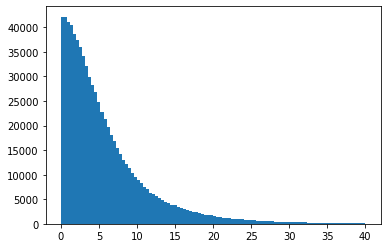

In [ ]:
plt.hist(results[results["error"] < 40]['error'], bins = 100)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


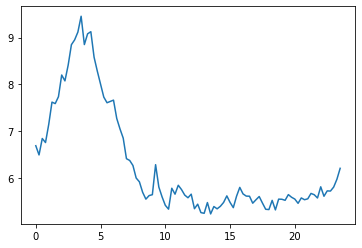

In [ ]:
time = results[['error', 'time']]
time['quarter'] = (time['time'] * 24 * 4).astype('int32')
time = time.drop(columns = ['time'])

mean_time = time.groupby(['quarter']).mean()
plt.plot(np.asarray(list(mean_time.index)) / 4, mean_time['error'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


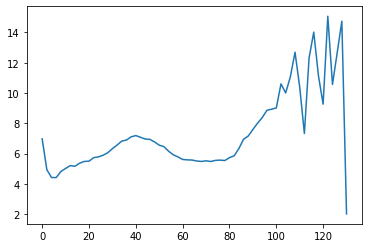

In [ ]:
speed = results[['error', 'case']]
speed['speed'] = (speed['case'] // 2) * 2
speed = speed.drop(columns = ['case'])

mean_speed = speed.groupby(['speed']).mean()
plt.plot(list(mean_speed.index), mean_speed['error'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


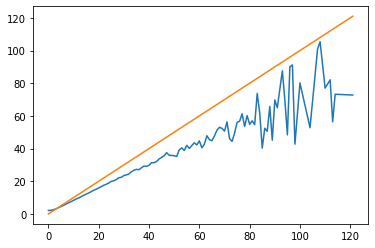

In [ ]:
difference = results[['error', 'case', 'label', 'time']]
difference['diff'] = np.fabs(difference['label'] - difference['case']).astype('int32')
# difference = difference.drop(columns = ['case', 'label'])

mean_diff = difference[['diff', 'error']].groupby(['diff']).mean()
plt.plot(list(mean_diff.index), mean_diff['error'])
plt.plot(list(mean_diff.index), list(mean_diff.index))
plt.show()

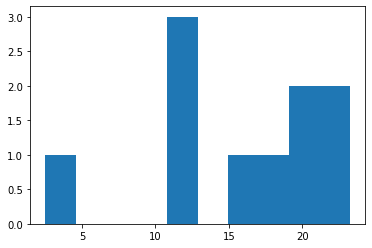

In [ ]:
high_diff = difference[difference['diff'] > 100]
hour = (high_diff['time'] * 24)
plt.hist(hour)
plt.show()